<a href="https://colab.research.google.com/github/RojaCM/DEEP-LEARNING-/blob/main/Image%20_cls_CFIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets ,layers,models

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
y_train=y_train.reshape(-1,)

In [8]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
y_test=y_test.reshape(-1,)

In [11]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [12]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [18]:
def plot_samples(x,y,index):
  plt.figure(figsize=(15,3))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

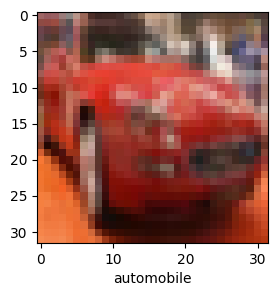

In [19]:
plot_samples(x_train,y_train,5)

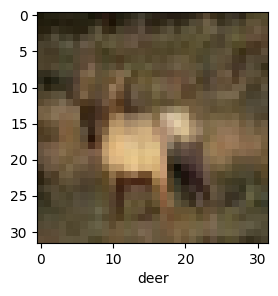

In [20]:
plot_samples(x_train,y_train,3)

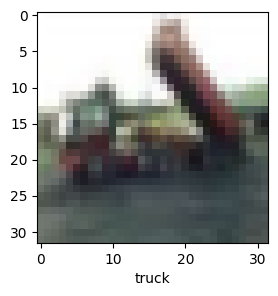

In [21]:
plot_samples(x_train,y_train,2)

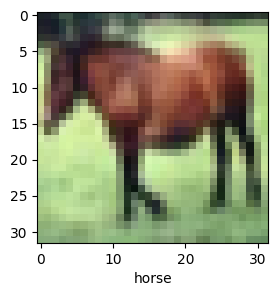

In [22]:
plot_samples(x_train,y_train,7)

In [23]:
x_train_norm=x_train/255.0

In [24]:
x_test_norm=x_test/255.0

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [30]:
cnn=models.Sequential([layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),
                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax')])

In [31]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 12s 4ms/step - loss: 2.0435 - accuracy: 0.3590
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3379 - accuracy: 0.5242
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1735 - accuracy: 0.5850
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0724 - accuracy: 0.6225
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9887 - accuracy: 0.6544
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9238 - accuracy: 0.6807
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8743 - accuracy: 0.6988
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8177 - accuracy: 0.7161
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7816 - accuracy: 0.7279
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.74

In [34]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0821 - accuracy: 0.6531


[1.0821430683135986, 0.6531000137329102]

In [35]:
y_pred=cnn.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [36]:
y_pred[:4]

array([[1.16719175e-02, 1.95080752e-03, 1.51290623e-02, 2.39992350e-01,
        6.91948906e-02, 4.96384442e-01, 9.32636857e-02, 9.07713827e-03,
        6.07976168e-02, 2.53812107e-03],
       [2.02477910e-02, 5.46042502e-01, 5.96481368e-05, 8.30425415e-06,
        4.16727879e-08, 1.25714251e-07, 1.71072173e-07, 6.94675890e-08,
        4.30671006e-01, 2.97034741e-03],
       [1.35718122e-01, 4.17132080e-01, 1.52352490e-02, 6.44960534e-03,
        9.35149379e-04, 1.36923394e-03, 1.10361516e-03, 6.08430651e-04,
        3.72852236e-01, 4.85961996e-02],
       [4.15166557e-01, 1.43859297e-01, 6.63273260e-02, 4.09680605e-03,
        9.09537892e-04, 1.16965314e-03, 2.26478651e-03, 7.34452115e-05,
        3.59077126e-01, 7.05547258e-03]], dtype=float32)

In [38]:
y_classes=[np.argmax(element) for element in y_pred]

In [39]:
y_classes[:5]

[5, 1, 1, 0, 6]

In [40]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

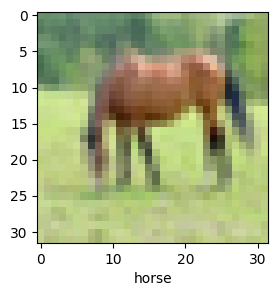

In [42]:
plot_samples(x_test,y_test,60)

TypeError: ignored

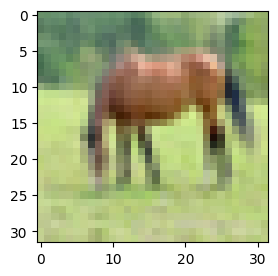

In [43]:
plot_samples(x_test,y_pred,60)